In [9]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt

In [10]:
spark = SparkSession.builder.getOrCreate()

In [16]:
# Load Data
data = spark.read.option("inferschema", "true").csv("Dataset.csv", header=True)

# Feature Extraction
data = data.select("sugar_level", "calories", "weight")

# Data Preprocessing
data = data.na.drop()

# Transform Data
data = data.withColumn("sugar_level", regexp_replace("sugar_level"," gr", "").cast("float"))
data = data.withColumn("calories", regexp_replace("calories", " cal", "").cast("int"))
data = data.withColumn("weight", regexp_replace("weight", " gr", "").cast("float"))

# Normalization
cols = data.columns
data = VectorAssembler(inputCols=cols, outputCol="vectorFeatures").transform(data)
data = StandardScaler(inputCol="vectorFeatures", outputCol="features").fit(data).transform(data)
data.show()

+-----------+--------+-------+--------------------+--------------------+
|sugar_level|calories| weight|      vectorFeatures|            features|
+-----------+--------+-------+--------------------+--------------------+
|     145.77|     764|1745.73|[145.770004272460...|[3.08350767910003...|
|       -4.6|     262|1903.09|[-4.5999999046325...|[-0.0973048954796...|
|      95.81|     448|1539.14|[95.8099975585937...|[2.02669173730889...|
|     100.16|     375| 746.22|[100.160003662109...|[2.11870845426838...|
|      -8.56|      93| 134.08|[-8.5600004196167...|[-0.1810717311749...|
|     140.24|     651|1989.74|[140.240005493164...|[2.96653029553966...|
|      35.26|     331|1994.42|[35.2599983215332...|[0.74586315704761...|
|      35.47|     245| 438.82|[35.4700012207031...|[0.75030539847756...|
|      59.76|     771|  31.05|[59.7599983215332...|[1.26411750241174...|
|      -7.61|      99|  157.4|[-7.6100001335144...|[-0.1609761484659...|
|      96.58|     506|  169.6|[96.5800018310546...|

In [17]:
# Generate Model
model = KMeans().setK(2).setSeed(1)
model = model.fit(data)

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[3.08350767910003...|         1|
|[-0.0973048954796...|         0|
|[2.02669173730889...|         1|
|[2.11870845426838...|         1|
|[-0.1810717311749...|         0|
|[2.96653029553966...|         1|
|[0.74586315704761...|         0|
|[0.75030539847756...|         0|
|[1.26411750241174...|         1|
|[-0.1609761484659...|         0|
|[2.04297982139672...|         1|
|[0.10957377224579...|         0|
|[2.12420818010260...|         1|
|[2.47048675385929...|         1|
|[1.83038970904993...|         0|
|[3.00481760573720...|         1|
|[2.05207572044428...|         0|
|[3.18060096674563...|         1|
|[2.90222426948456...|         1|
|[2.10432424557424...|         1|
+--------------------+----------+
only showing top 20 rows



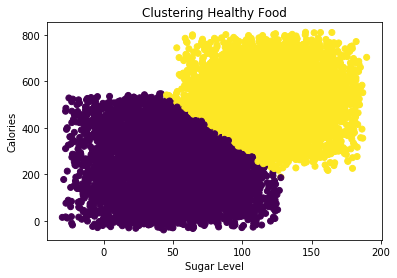

In [18]:
# Plotting
prediction = model.transform(data)
prediction.select("features", "prediction").show(20)
prediction = prediction.toPandas()
plt.title("Clustering Healthy Food")
plt.xlabel("Sugar Level")
plt.ylabel("Calories")
plt.scatter(prediction["sugar_level"], prediction["calories"], c=prediction["prediction"])
plt.show()